In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.optimize 
import cv2
%matplotlib inline

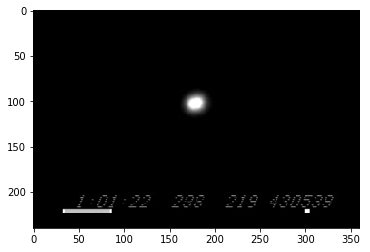

In [4]:
filename = 'snap_00001.png'
img = Image.open(filename).convert('L') 
data = np.asarray(img)

plt.imshow(data, cmap='gray')
plt.savefig('still.pdf')

In [5]:
#trying again with stack overflow code from james's link
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

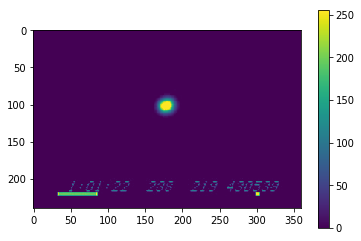

In [6]:
# Create x and y indices
x = range(len(data[0]))
y = range(len(data))
x, y = np.meshgrid(x, y)

##create data
#data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

#use data from image

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data)
plt.colorbar()

In [7]:
initial_guess = (250,175,100,20,20,0,1)

popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), data.reshape(240*360), p0=initial_guess)
print(popt)

[  3.16895630e+02   1.78582994e+02   1.02149231e+02   7.13237032e+00
   6.04571578e+00   2.75339180e-01   1.32212505e+00]


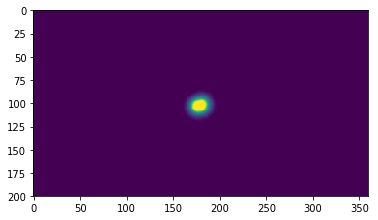

In [8]:
image = cv2.imread('movies/stills_vlc-091225-010119/snap_00001.png')[0:200]
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey)
blurred = cv2.GaussianBlur(grey, (3,3), 0)

In [9]:
for item in blurred:
    if item.any()>0:
        print(item)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

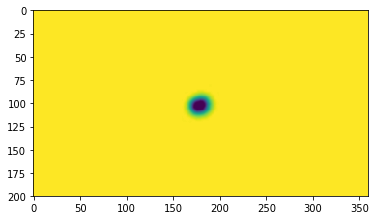

In [14]:
reverseImg = 255-blurred
plt.imshow(reverseImg)

In [15]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()
     
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 256;
     
# Filter by Area.
params.filterByArea = True
params.minArea = 30
     
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
     
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5
     
# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.5
     
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
#reversemask=255-mask
keypoints = detector.detect(reverseImg)
print(len(keypoints))

1


In [16]:
x,y = keypoints[0].pt
print(x,y)

178.61746215820312 102.15062713623047


In [17]:
print(keypoints[0].size)

19.452699661254883


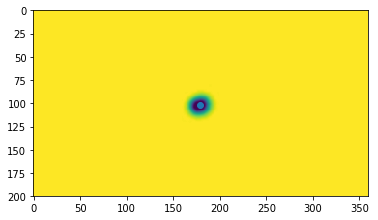

In [18]:
plt.imshow(reverseImg)
plt.plot(x,y, 'o')

In [19]:
xmin = int(x) - 25
xmax = int(x) + 25
ymin = int(y) - 25
ymax = int(y) + 25

In [91]:
centerx = []
centery = []
sigx = []
sigy = []

def iter_Gauss(data):

    shape = data.shape
    print(shape)
    # Create x and y indices
    x=range(shape[1])
    y=range(shape[0])
    x,y = np.meshgrid(x,y)

    # try to fit the data generated beforehand
    initial_guess = (250,shape[1]/2,shape[0]/2,10,10,0,1) #amp, centerx, centery, sigx,sigy, theta, offset

    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x,y), 
                                          data.reshape(shape[0]*shape[1]), 
                                          p0 = initial_guess)
    print('{}:'.format(i), popt)
    centerx.append(popt[1])
    centery.append(popt[2])
    #sigx.append(popt[3])
    #sigy.append(popt[4])
    data_fitted = twoD_Gaussian((x, y), *popt)
    #print('datafitted:', data_fitted)
    fig, ax = plt.subplots(1, 1)
    #ax.hold(True)
    ax.imshow(data.reshape(shape[0],shape[1]), cmap=plt.cm.jet, origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()))
    ax.contour(x, y, data_fitted.reshape(shape[0],shape[1]), 8, colors='w')
    
    plt.title('Fitted')
    plt.savefig('fitted.png')
    plt.show()
    return (popt[3], popt[4]) #optional
    #i += 1



In [92]:
cap = cv2.VideoCapture('movies/vlc-100106-115345.mp4')

(16, 16)
0: [ 331.22952521    8.99517942    8.33435467   -2.84339857    3.67246019
   -1.12359619  -12.25291808]


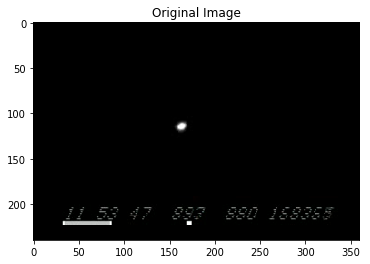

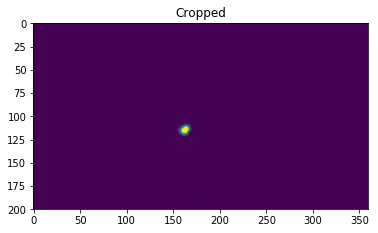

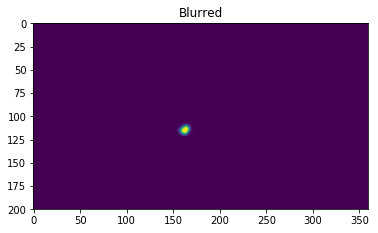

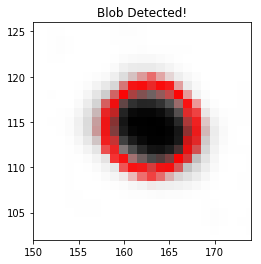

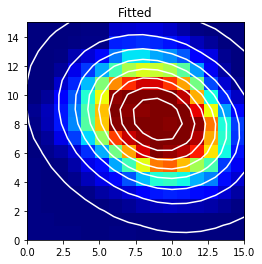

focus: 4.64455372499
(20, 20)
0: [ 324.02954162   10.87926237   10.81494052   -3.54571867   -2.78704733
    0.48474534   -5.93862528]


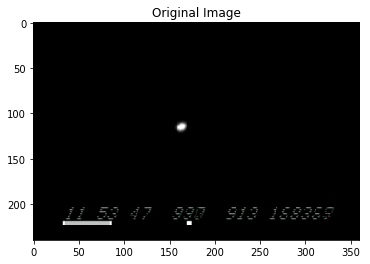

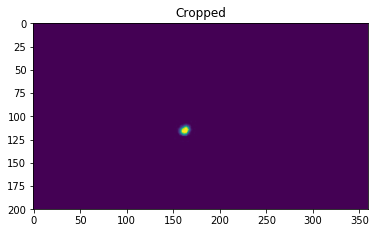

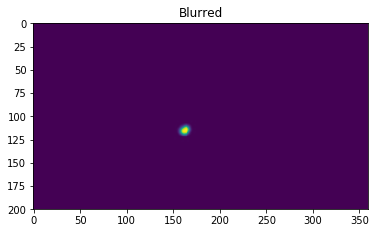

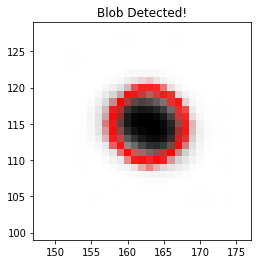

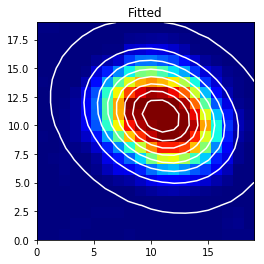

focus: 4.5099616113
(20, 20)
0: [ 329.6309012    10.77235522   10.27783091    2.76479685    3.56599576
    5.16921768   -6.35447546]


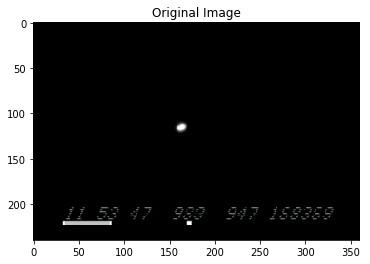

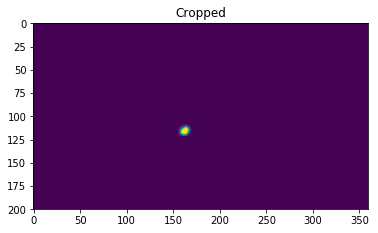

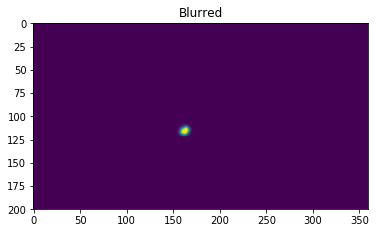

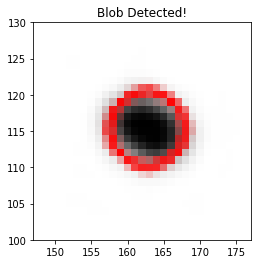

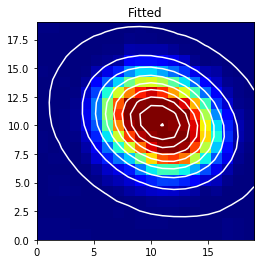

focus: 4.51225302874
(20, 20)
0: [ 329.6909057    10.77326461   10.27813789    2.76520959    3.56293631
    2.02962663   -6.3373262 ]


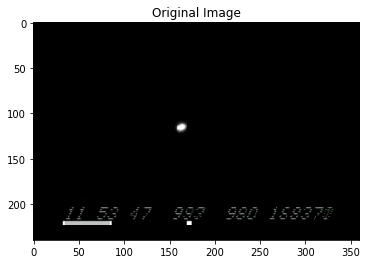

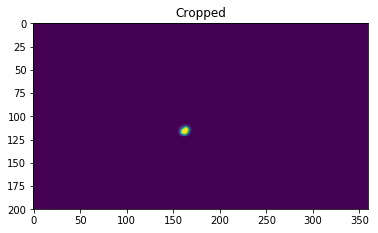

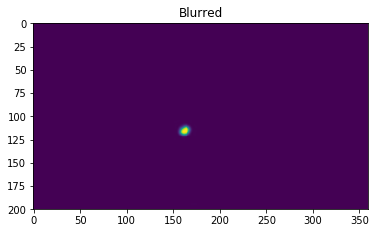

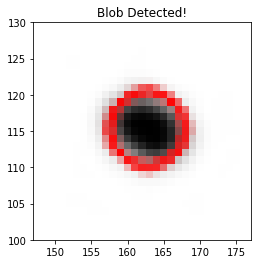

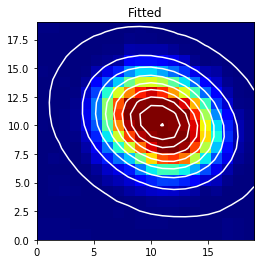

focus: 4.51008860235
(20, 20)
0: [ 330.04635282   10.7724123    10.27901236    3.5620096     2.75972278
    0.4544593    -6.29896069]


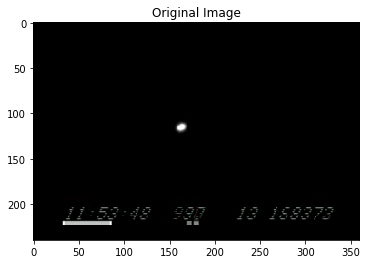

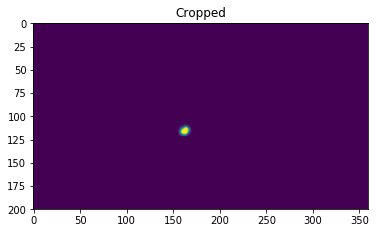

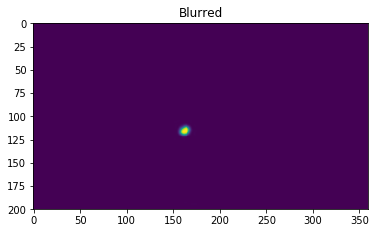

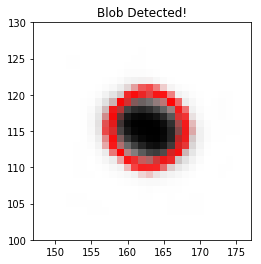

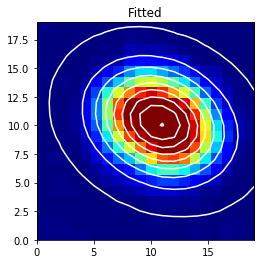

focus: 4.50599403107
(20, 20)
0: [ 330.20379832   10.77221248   10.28087       3.56656298    2.75416658
   -2.68364072   -6.29526658]


KeyboardInterrupt: 

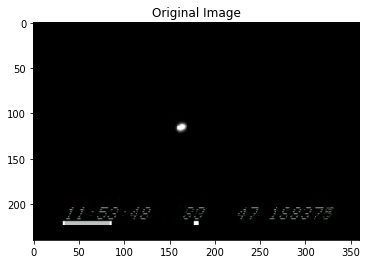

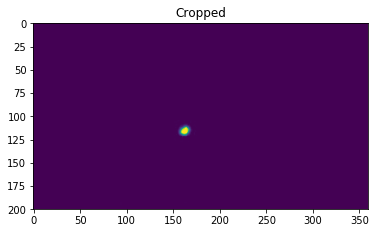

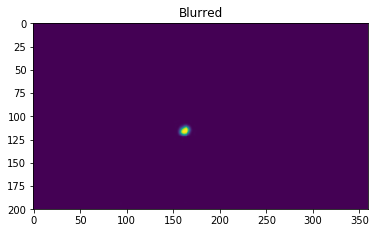

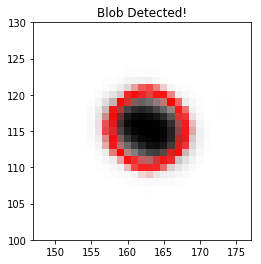

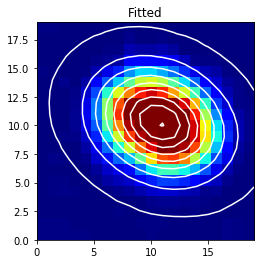

In [93]:
#note that this cell always throws an error when it's done running
#don't worry as long as you ran the cell above first
i = 0
#final = [] #stores all data in a list, helpful for debugging, not necessary


focus = []

#plt.ion()
#fig = plt.figure()
#ax = fig.add_subplot(111)
#line1, = ax.plot(focus, 'b-')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    plt.figure()
    plt.imshow(frame, cmap = 'gray')
    plt.title('Original Image')
    plt.savefig('original.png')
    
    # Our operations on the frame come here
    # converting to grayscale
    data = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)[:200] #indexing crops off the bottom
    plt.figure()
    plt.imshow(data)
    plt.title('Cropped')
    plt.savefig('cropped.png')
    # gaussian blur reduces noise, hopefully gets rid of hot pixels
    # only use 'blurred' for blob detection
    plt.figure()
    blurred = cv2.GaussianBlur(data, (3,3), 0)
    plt.imshow(blurred)
    plt.title('Blurred')
    plt.savefig('blurred.png')
    
    # reverse because blob detection is optimized to detect dark blobs
    reverseImg = 255-blurred 

    # Set up the SimpleBlobdetector with default parameters.
    params = cv2.SimpleBlobDetector_Params()
     
    # Change thresholds
    params.minThreshold = 0;
    params.maxThreshold = 256;
     
    # Filter by Area.
    params.filterByArea = True
    params.minArea = 10
     
    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.1
     
    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5
     
    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.5
    
    #make blob detection object
    detector = cv2.SimpleBlobDetector_create(params)
 
    # Detect blobs.
    keypoints = detector.detect(reverseImg) #keypoints is a length 1 list (hopefully)
    
    # extract blob coordinates
    blobx, bloby = keypoints[0].pt
    plt.figure()
    #plt.imshow(reverseImg)
    #plt.plot(blobx, bloby, 'o')
    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(reverseImg, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(im_with_keypoints)
    plt.title('Blob Detected!')
    plt.savefig('detected.png')

    # set cropping limits 
#     xmin = int(blobx) - 25
#     xmax = int(blobx) + 25
#     ymin = int(bloby) - 25
#     ymax = int(bloby) + 25
    
    rad = int(keypoints[0].size/2)
    #padding = int(0.5*diam)
    xmin = int(blobx) - 2*rad 
    xmax = int(blobx) + 2*rad 
    ymin = int(bloby) - 2*rad
    ymax = int(bloby) + 2*rad 
    
    plt.xlim(xmin-rad, xmax+rad)
    plt.ylim(ymin-rad, ymax+rad)
    # call the fitting function defined above
    sigx, sigy = iter_Gauss(data[ymin:ymax, xmin:xmax]) 
  
    # Display the resulting frame
    cv2.imshow('frame',data)
    
    #calculate focus using sigma_x and sigma_y
    focus.append(np.sqrt(sigx**2 + sigy**2))
    print('focus:', np.sqrt(sigx**2 + sigy**2))
   
    #unsure what this part does but it was in the code we found online
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything's done, release the capture
cap.release()
cv2.destroyAllWindows()


In [55]:
import time
time.time()

1548273020.99682

In [60]:
time.time()

1548273108.707368

In [95]:
from astropy.table import Table

In [135]:
with open('focus.txt', 'r') as infile:
    lines = [line.strip().split(',') for line in infile.readlines()]

In [136]:
lines = [[float(item) for item in line] for line in lines]
lines

[[0.0,
  0.21555709838867188,
  4.4872959100889025,
  162.9419403076172,
  114.36875915527344],
 [5.0,
  0.37177586555480957,
  4.506196291027338,
  162.7622833251953,
  115.28514099121094],
 [10.0,
  0.5136160850524902,
  4.562071466884677,
  163.40994262695312,
  114.27825927734375],
 [15.0,
  0.6415789127349854,
  4.644779605081528,
  160.92478942871094,
  114.70988464355469],
 [20.0,
  0.7701117992401123,
  4.649631291421361,
  160.93772888183594,
  114.72393798828125],
 [25.0,
  0.9025359153747559,
  4.654973799410461,
  162.354736328125,
  114.9383544921875],
 [30.0,
  1.0514910221099854,
  4.624004340123847,
  162.03428649902344,
  114.6399154663086],
 [35.0,
  1.185431957244873,
  4.583491268930121,
  162.7381591796875,
  115.16331481933594],
 [40.0,
  1.3060667514801025,
  4.5714674314557175,
  162.79205322265625,
  115.1543960571289],
 [45.0,
  1.4553561210632324,
  4.818702601658092,
  161.9221649169922,
  114.5662612915039],
 [50.0,
  1.5839688777923584,
  4.662343101001853

In [138]:
# separate the runs
i = 0
for line in lines:
    if line[0] == 0.0:
        print(i)
    i+=1

0
57
104


In [140]:
run1 = lines[0:57]

[[0.0,
  0.21555709838867188,
  4.4872959100889025,
  162.9419403076172,
  114.36875915527344],
 [5.0,
  0.37177586555480957,
  4.506196291027338,
  162.7622833251953,
  115.28514099121094],
 [10.0,
  0.5136160850524902,
  4.562071466884677,
  163.40994262695312,
  114.27825927734375],
 [15.0,
  0.6415789127349854,
  4.644779605081528,
  160.92478942871094,
  114.70988464355469],
 [20.0,
  0.7701117992401123,
  4.649631291421361,
  160.93772888183594,
  114.72393798828125],
 [25.0,
  0.9025359153747559,
  4.654973799410461,
  162.354736328125,
  114.9383544921875],
 [30.0,
  1.0514910221099854,
  4.624004340123847,
  162.03428649902344,
  114.6399154663086],
 [35.0,
  1.185431957244873,
  4.583491268930121,
  162.7381591796875,
  115.16331481933594],
 [40.0,
  1.3060667514801025,
  4.5714674314557175,
  162.79205322265625,
  115.1543960571289],
 [45.0,
  1.4553561210632324,
  4.818702601658092,
  161.9221649169922,
  114.5662612915039],
 [50.0,
  1.5839688777923584,
  4.662343101001853

In [141]:
time = [line[1] for line in run1]
focus = [line[2] for line in run1]
centerx = [line[3] for line in run1]
centery = [line[4] for line in run1]

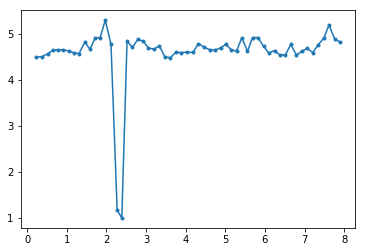

In [148]:
plt.plot(time, focus, '.-')
#plt.plot(time, centroid, '.-')

In [155]:
img_center = (180,100)
# centroid is calculated as the distance from (0,0) the bottom left corner of the image
centroid = [np.sqrt(x**2 + y**2) for x, y in zip(centerx, centery)]

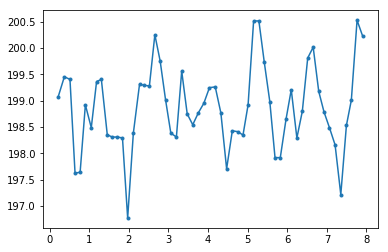

In [156]:
plt.plot(time, centroid, '.-')